# 📊 Banking Sales Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading of dataset dataset
df = pd.read_csv("sales_data.csv")

# Display top rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Date,Advisor,Region,Product,Units Sold,Revenue,Target Met
0,01-01-2024,Alex Sharma,West,Credit Card,8,1600,Yes
1,02-01-2024,Priya Mehta,East,Loan,5,7500,No
2,03-01-2024,Harpreet Dhaliwal,North,Savings Account,10,500,Yes
3,04-01-2024,Alex Sharma,West,Credit Card,8,1600,Yes
4,05-01-2024,Priya Mehta,East,Loan,5,7500,No


In [5]:
# Summary statistics
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        90 non-null     object
 1   Advisor     90 non-null     object
 2   Region      90 non-null     object
 3   Product     90 non-null     object
 4   Units Sold  90 non-null     int64 
 5   Revenue     90 non-null     int64 
 6   Target Met  90 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.1+ KB


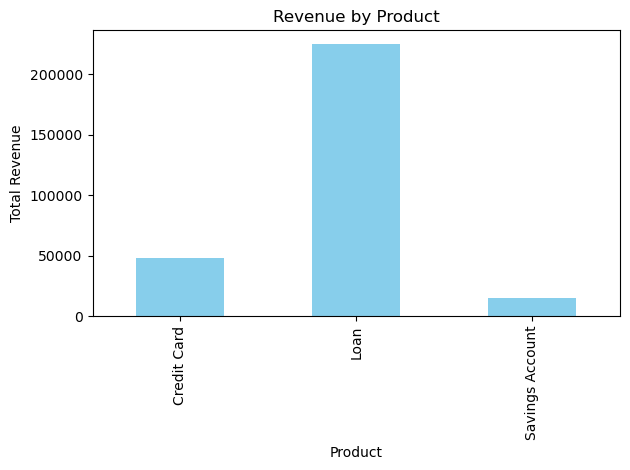

In [7]:
# Total revenue by product
revenue_by_product = df.groupby("Product")["Revenue"].sum()
revenue_by_product.plot(kind="bar", title="Revenue by Product", color="skyblue")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

## Phase 1: Data Exploration

#### Basic Information

In [9]:
print ('Dimension :',df.shape)  # Rows & columns
print ()
print ('Column Labels:', list (df.columns))  # Column names
print ()
print ('Summary Statistics:')
print (df.describe()) 
print ()
print('Missing Values:')
print (df.isnull().sum())


Dimension : (90, 7)

Column Labels: ['Date', 'Advisor', 'Region', 'Product', 'Units Sold', 'Revenue', 'Target Met']

Summary Statistics:
       Units Sold      Revenue
count   90.000000    90.000000
mean     7.666667  3200.000000
std      2.066316  3090.761878
min      5.000000   500.000000
25%      5.000000   500.000000
50%      8.000000  1600.000000
75%     10.000000  7500.000000
max     10.000000  7500.000000

Missing Values:
Date          0
Advisor       0
Region        0
Product       0
Units Sold    0
Revenue       0
Target Met    0
dtype: int64


## Phase 2: Insightful Analysis

#### Top Performing Products

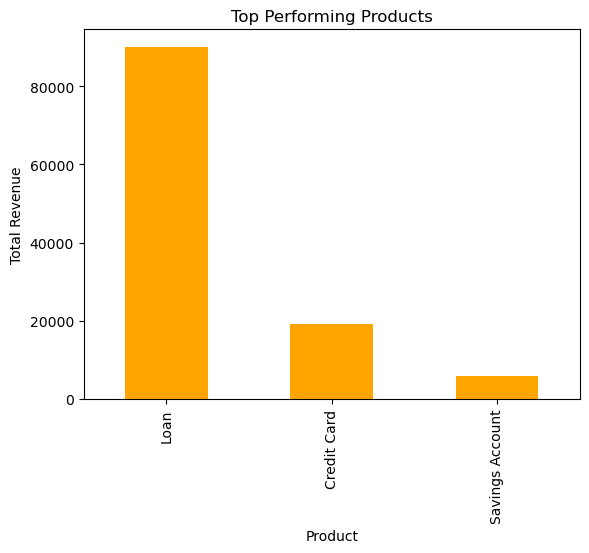

In [64]:
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title="Top Performing Products", color='orange')
plt.xlabel("Product")
plt.ylabel("Total Revenue") 
plt.show()

#### Revenue by Region

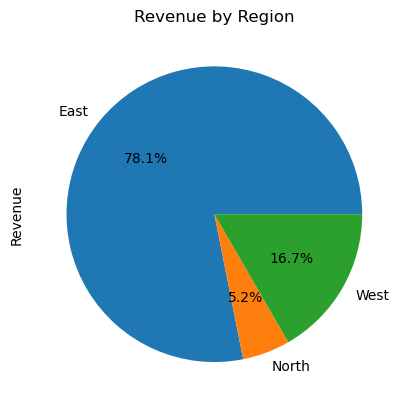

In [15]:
df.groupby("Region")["Revenue"].sum().plot(kind='pie', autopct='%1.1f%%', title="Revenue by Region")
plt.show()

#### Top performing region by total revenue vs average revenue per sale

        total_revenue  total_units_sold  avg_revenue_per_unit
Region                                                       
East            90000                60                1500.0
North            6000               120                  50.0
West            19200                96                 200.0


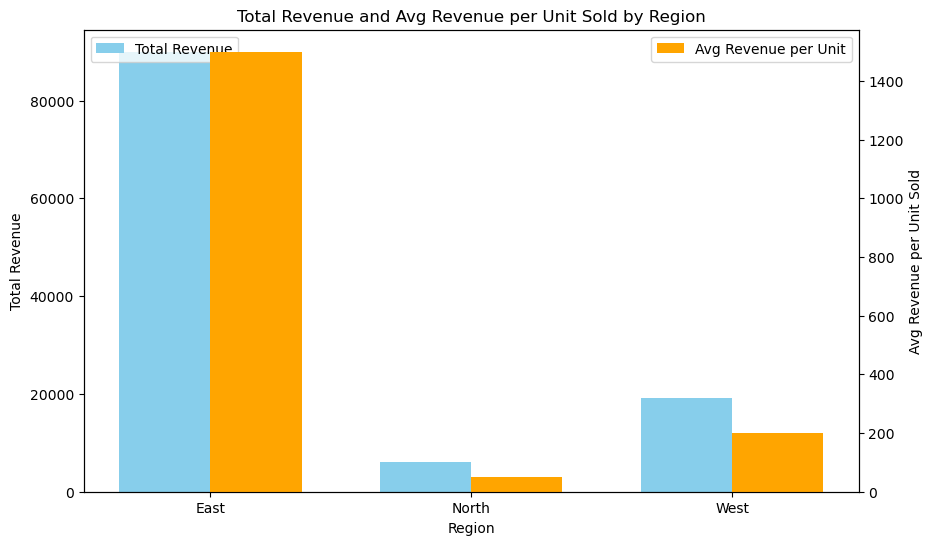

In [53]:

# Calculate total revenue and total units sold by region
agg_data = df.groupby("Region").agg(
    total_revenue=("Revenue", "sum"),
    total_units_sold=("Units Sold", "sum")
)

# Calculate average revenue per unit sold with consistent name
agg_data["avg_revenue_per_unit"] = agg_data["total_revenue"] / agg_data["total_units_sold"]

print (agg_data)

# Data
regions = agg_data.index
total_revenue = agg_data["total_revenue"]
avg_rev_per_unit = agg_data["avg_revenue_per_unit"]

# Plot setup
x = np.arange(len(regions))  # label locations
width = 0.35  # bar width

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot total revenue bars
bars1 = ax1.bar(x - width/2, total_revenue, width, label='Total Revenue', color='skyblue')
ax1.set_ylabel('Total Revenue')
ax1.set_xlabel('Region')
ax1.set_title('Total Revenue and Avg Revenue per Unit Sold by Region')
ax1.set_xticks(x)
ax1.set_xticklabels(regions)

# Create second y-axis to plot average revenue per unit
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, avg_rev_per_unit, width, label='Avg Revenue per Unit', color='orange')
ax2.set_ylabel('Avg Revenue per Unit Sold')

# Add legends to each axis individually
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


#### Monthly Trends

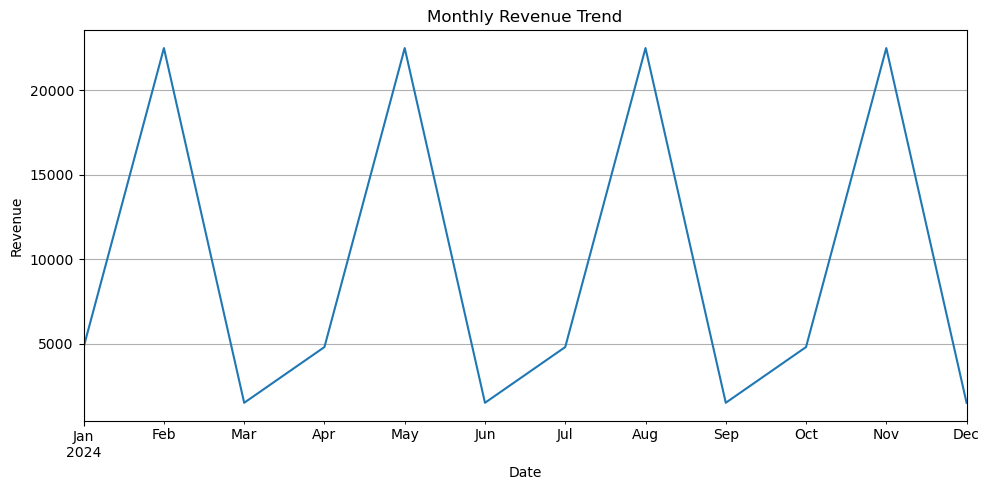

In [18]:
# Step 3: Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Step 4: Drop rows with invalid or missing dates
df.dropna(subset=["Date"], inplace=True)

# Step 5: Set 'Date' as index
df.set_index("Date", inplace=True)

# Step 6: Make sure 'Revenue' is numeric
df["Revenue"] = pd.to_numeric(df["Revenue"], errors='coerce')
df.dropna(subset=["Revenue"], inplace=True)

# Step 7: Resample by month-end and plot
monthly_revenue = df["Revenue"].resample("ME").sum()

# Step 8: Plot if data exists
if not monthly_revenue.empty:
    monthly_revenue.plot(title="Monthly Revenue Trend", figsize=(10, 5))
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid revenue data to plot.")

## Phase 3: Summary Insights

#### 📌 Key Insights:
- The East region generates the highest total revenue.
- The East region has the highest average revenue per unit sold.
- The Loan product contributes the most to overall revenue.
